# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [254]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [255]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [256]:
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [257]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [258]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [259]:
df.admit.sum()
#127 students accepted out of 400 

127

In [260]:
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

In [261]:
df.prestige.unique()

array([  3.,   1.,   4.,   2.,  nan])

In [262]:
df.count(axis=0)

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [263]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [264]:
accepted_gre = df[(df.admit > 0)]['gre']
accepted_gre.describe()

count    127.000000
mean     618.897638
std      108.884884
min      300.000000
25%      540.000000
50%      620.000000
75%      680.000000
max      800.000000
Name: gre, dtype: float64

In [265]:
accepted_gpa = df[(df.admit > 0)]['gpa']
accepted_gpa.describe()

count    126.000000
mean       3.489206
std        0.371655
min        2.420000
25%             NaN
50%             NaN
75%             NaN
max        4.000000
Name: gpa, dtype: float64

gpa    2.26
dtype: float64

In [227]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

## Questions

> ### Question 1.  How many observations are in our dataset?

In [228]:
# TODO
df.shape[0]

400

Answer: There are 4 columns representing GRE, GPA, Prestige Rankings, and Admission status with 400 obversations in our dataset.. 

> ### Question 2.  Create a summary table.

Variable | Description | Type of Variable
---|---|---
`admit` | 0 = Not admitted, 1 = Admitted | Categorical
`gre` | GRE (range: 200-800) | Continuous
`gpa` | GPA (range: 0-4.0) | Continuous
`prestige` | 1 = High prestige, 2 = Good prestige, 3 = Low prestige, 4 = Not prestigious | Categorical

In [229]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.0,0.0,1.0,1.0
gre,398.0,588.040201,115.628513,220.00,NaN,NaN,NaN,800.0
gpa,398.0,3.390930,0.380630,2.26,NaN,NaN,NaN,4.0
prestige,399.0,2.486216,0.945333,1.00,NaN,NaN,NaN,4.0


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [230]:
# TODO
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: GRE scores would have a larger variance because there is higher range of possible values than GPA, as gpa is only measured 0.00 - 4.00 whearas GRE scores can range from 0.00 - 800.000
Therefore the squared distance of the values diveating from the mean will be a much higher number for the GRE because the range is higher in proportion than GPA scores.. and they are not scaled the same..  

> ### Question 4.  Drop data points with missing data.

In [231]:
# TODO
df = df[['admit','gre','gpa','prestige']].dropna()
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [232]:
# TODO
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [233]:
df.count(axis=0)

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: We can tell that we dropped the correct data because in our original dataset we had 400 obversations with... after applying the dropna function we only have 397 with no null numbers present.. Thus verifying that we dropped the observations that posses NaN... 

> ### Question 6.  Create boxplots for `gre` and `gpa`.

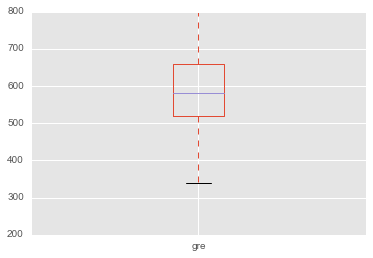

In [234]:
# TODO
df[['gre']].plot(kind = 'box')

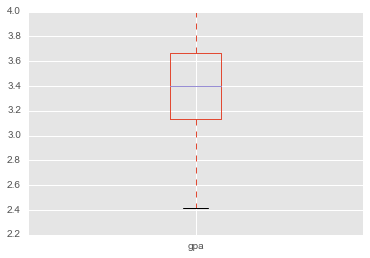

In [235]:
# TODO
df['gpa'].plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: Boxplots show the distrubtion of the data as it pertains to the first quartile, median (middle line in center of box), third quartile, max, and min values... The boxplots also show any potential outliers, anything outside the 1.5 + IQR and 1.5 - IQR can be defined as a potential outlier.. 
The median GRE score is approx ~580 and 3.4 for GPA 

> ### Question 8.  Plot the distribution of each variable.

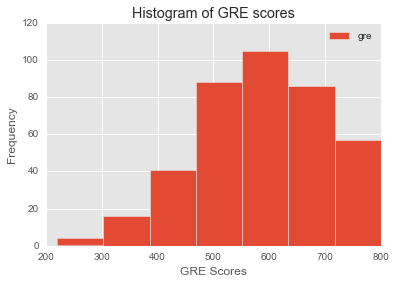

In [236]:
# TODO
df[['gre']].plot(kind = 'hist', bins = 7, title = 'Histogram of GRE scores')
plt.xlabel('GRE Scores')

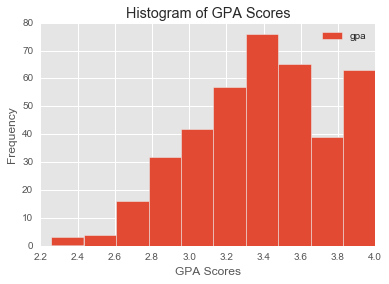

In [237]:
# TODO
df[['gpa']].plot(kind = 'hist', bins = 10, title = 'Histogram of GPA Scores')
plt.xlabel('GPA Scores')

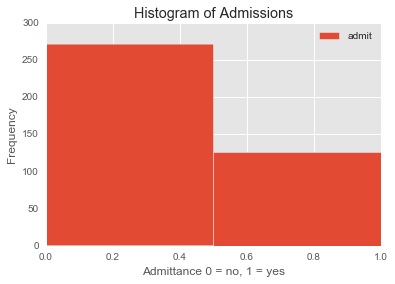

In [251]:
# TODO
df[['admit']].plot(kind = 'hist', bins = 2, title = 'Histogram of Admissions')
plt.xlabel('Admittance 0 = no, 1 = yes')

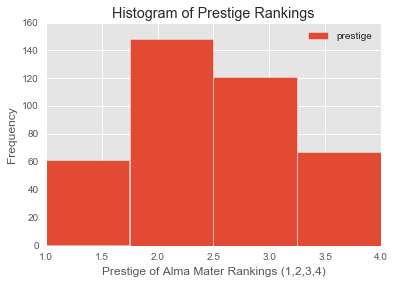

In [252]:
# TODO
df[['prestige']].plot(kind = 'hist', bins = 4, title = 'Histogram of Prestige Rankings')
plt.xlabel('Prestige of Alma Mater Rankings (1,2,3,4)')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

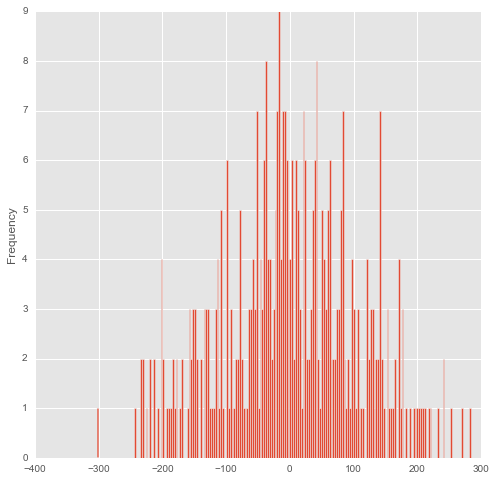

In [249]:
# TODO
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()
model.resid.plot(kind = 'hist', bins = 200, figsize = (8,8))

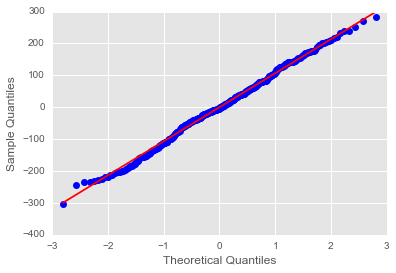

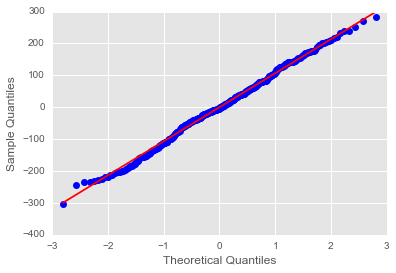

In [250]:
# TODO
sm.qqplot(model.resid, line = 's')

Answer: Above as you can see we checked the normality distrubtion of GRE and GPA scores by creating a model... The histogram of the residuals models a normal distrubtion and the qq plot passes the line test... Therefore we can conclude that our assumption of normality is viable and we would meet that expectation. 

> ### Question 10.  Create a correlation matrix for the dataset

In [242]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [243]:
df.cov()

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: The variables that represent the greatest chances of being colinear, would be GPA and GRE scores as it possesed the highest correlation coefficient out of all the variables.. Also it is important to note that admittance status and prestige represent the second highest level of correlation, however they are negatively correlated... Implying that as prestige levels go down, so will your chance of acceptance.. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: 
1. Check for missing data and remove observations / Clean Organize Data (check for outliers).
2. Add viable summary columns to data for analysis purposes
2. Check for colinearity (corr matrices).
3. Check for normal distribution using qq plots/histograms.

> ### Question 13.  What is your hypothesis?

Answer:
Students from more prestigous schools will have a higher chance of being accepted into the UCLA graduate school.. As the prestige level of school gets worse, you chance of acceptance will decline as well, representing a negative correlation.. 